In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Задание 1
Загрузите в библиотеку Pandas DataFrame из CSV-файла исходные данные о покупателях с веб-портала (все строки). При необходимости преобразуйте данные.

In [2]:
# чтение файла

df = pd.read_csv('web_clients_correct.csv', sep=',')
df['region'] = df['region'].replace('-', None)
df

,name,device_type,browser,sex,age,bill,region
0,Allen Miss. Elisabeth Walton,mobile,Chrome,female,29.0,885,St Louis: MO
1,Allison Master. Hudson Trevor,tablet,Opera,male,48.0,850,Montreal: PQ / Chesterville: ON
2,Allison Miss. Helen Loraine,laptop,Firefox,female,48.0,1034,Montreal: PQ / Chesterville: ON
3,Allison Mr. Hudson Joshua Creighton,desktop,Internet Explorer,male,30.0,214,Montreal: PQ / Chesterville: ON
4,Allison Mrs. Hudson J C (Bessie Waldo Daniels),laptop,Firefox,female,25.0,993,Montreal: PQ / Chesterville: ON
...,...,...,...,...,...,...,...
910,Kallio Mr. Nikolai Erland,tablet,Opera,male,17.0,1273,None
911,Kalvik Mr. Johannes Halvorsen,mobile,Opera,male,21.0,1136,None
912,Karaic Mr. Milan,desktop,Opera,male,30.0,465,None
913,Karlsson Mr. Einar Gervasius,desktop,Internet Explorer,male,21.0,275,None


In [3]:
# чистка регионов

df['region'] = df['region'].str.split('/').str[0]
df['region'] = df['region'].str.split(':').str[0]
df['region'].unique()

array(['St Louis', 'Montreal', 'New York', 'Hudson', 'Belfast', 'Bayside',
       'Montevideo', 'Paris', None, 'Hessle', 'Winnipeg', 'San Francisco',
       'Dowagiac', 'Stockholm', 'Trenton', 'Glen Ridge', 'Youngstown',
       'Birkdale', 'London ', 'Cooperstown', 'St Leonards-on-Sea',
       'Los Angeles', 'Pomeroy', 'Omaha', 'Philadelphia', 'Denver',
       'Belmont', 'Washington', 'Austria-Hungary ', 'Germantown',
       'Bryn Mawr', 'Ascot', 'Little Onn Hall', 'Amenia', 'London',
       'Liverpool', 'Stoughton', 'Victoria', 'Lakewood', 'Roachdale',
       'Milwaukee', 'Lima', 'Calgary', 'Deephaven', 'Mt Airy',
       'Brookline', 'Brooklyn', 'Westcliff-on-Sea', 'Zurich', 'Scituate',
       "St Anne's-on-Sea", 'Greenwich', 'Kingston', 'Brighton', 'Chicago',
       'Indianapolis', 'Bennington', 'Buffalo', 'Southington ', 'Boston',
       'Portland', 'Springfield', 'Brockton', 'Belgium  Montreal',
       'Vancouver', 'Dorchester', 'East Bridgewater', 'Fond du Lac',
       'Green Bay'

## Задание 2
Выполните анализ используемых браузеров, устройств, пола, региона, сумм покупки. Сформируйте сводные таблицы с указанием min, max, avg, median по суммам покупки. Чтобы выполнить задание, нужно использовать библиотеку Pandas.

In [4]:
# сводная по типу устройств

tbl_1 = pd.pivot_table(df, index='device_type', values='bill', aggfunc=['min', 'max', 'median', 'sum', 'count'])
tbl_1[('avg', 'bill')] = (tbl_1[('sum', 'bill')] / tbl_1[('count', 'bill')]).round(2)
tbl_1

,min,max,median,sum,count,avg
,bill,bill,bill,bill,bill,bill
device_type,,,,,,
desktop,34,1485,820,175438,221,793.84
laptop,42,1477,823,177205,221,801.83
mobile,40,1497,735,173531,235,738.43
tablet,33,1500,744,182329,238,766.09


In [5]:
# сводная по браузерам

tbl_2 = pd.pivot_table(df, index='browser', values='bill', aggfunc=['min', 'max', 'median', 'sum', 'count'])
tbl_2[('avg', 'bill')] = (tbl_2[('sum', 'bill')] / tbl_2[('count', 'bill')]).round(2)
tbl_2

,min,max,median,sum,count,avg
,bill,bill,bill,bill,bill,bill
browser,,,,,,
Chrome,40,1500,756.0,233255,305,764.77
Firefox,33,1496,804.0,239729,300,799.10
Internet Explorer,60,1477,694.5,100427,140,717.34
Opera,35,1493,846.5,135092,170,794.66


In [6]:
# сводная по полу

tbl_3 = pd.pivot_table(df, index='sex', values='bill', aggfunc=['min', 'max', 'median', 'sum', 'count'])
tbl_3[('avg', 'bill')] = (tbl_3[('sum', 'bill')] / tbl_3[('count', 'bill')]).round(2)
tbl_3

,min,max,median,sum,count,avg
,bill,bill,bill,bill,bill,bill
sex,,,,,,
female,33,1500,769,266147,344,773.68
male,34,1497,789,442356,571,774.70


In [7]:
# сводная по региону

tbl_4 = pd.pivot_table(df, index='region', values='bill', aggfunc=['min', 'max', 'median', 'sum', 'count'])
tbl_4[('avg', 'bill')] = (tbl_4[('sum', 'bill')] / tbl_4[('count', 'bill')]).round(2)
tbl_4

,min,max,median,sum,count,avg
,bill,bill,bill,bill,bill,bill
region,,,,,,
?Havana,141,141,141.0,141,1,141.00
Aberdeen,232,1028,630.0,1260,2,630.00
Albany,1278,1278,1278.0,1278,1,1278.00
Altdorf,995,1441,1218.0,2436,2,1218.00
Amenia,1044,1330,1187.0,2374,2,1187.00
...,...,...,...,...,...,...
Woodford County,1217,1217,1217.0,1217,1,1217.00
Worcester,223,1262,1019.0,2504,3,834.67


## Задание 3
Оцените зависимость суммы покупки от региона. Выполните визуализацию результатов анализа зависимости. Чтобы выполнить задание, можно использовать библиотеки Seaborn или Plotly (по вашему выбору).

Чтобы оценить зависимость, стоит сначала проверить количественную переменную, т.е. чек, на нормальность, чтобы понимать, какие стат. модели можно включать в исследование, а какие - нет

In [8]:
# стат. характеристика столбца чек

df['bill'].describe()

count     915.000000
mean      774.320219
std       413.293281
min        33.000000
25%       418.500000
50%       778.000000
75%      1138.500000
max      1500.000000
Name: bill, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x184c0acbe10>,
 'caps': [<matplotlib.lines.Line2D at 0x184c02775d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x184c02ab050>],
 'medians': [<matplotlib.lines.Line2D at 0x184c0ada610>],
 'fliers': [<matplotlib.lines.Line2D at 0x184c0adab50>],
 'means': []}

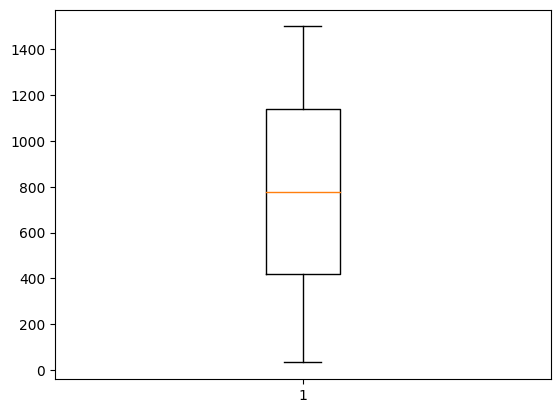

In [9]:
# проверка на выбросы и перекосы в процентилях

plt.boxplot(df['bill'])

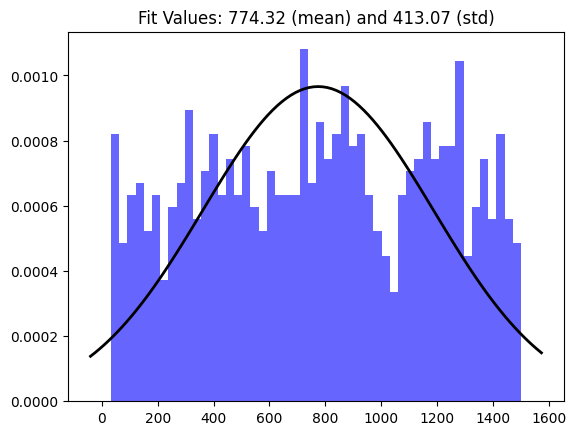

In [10]:
# накладываем распределение количественной перменной на форму нормального распределения

mu, std = norm.fit(df['bill'])

plt.hist(df['bill'], bins=50, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} (mean) and {:.2f} (std)".format(mu, std)
plt.title(title)

plt.show()

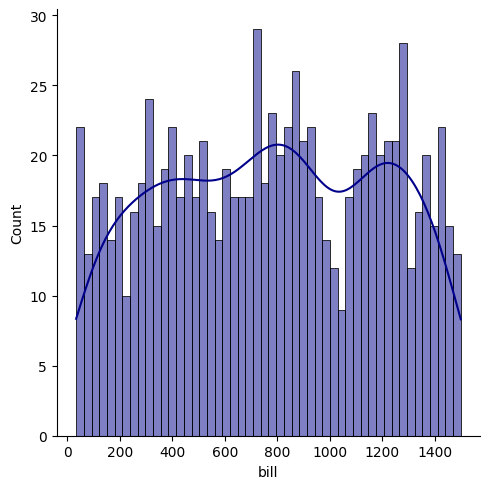

In [11]:
# смотрим на реальное распределение переменной

sns.displot(df['bill'], kde=True, 
             bins=50, color = 'darkblue')

Вывод по распределению: распределение перменной bill не нормально, но при этом равномерно, нет выбросов, форма стремится к нормальной. Можно проводить стандартное стат. ислледование

In [12]:
# сортировка сводной по регионам для построения топ-20 лучших и худших регионов по сумме чека

tbl_4 = tbl_4.sort_values(by=('sum', 'bill'))
tbl_4

,min,max,median,sum,count,avg
,bill,bill,bill,bill,bill,bill
region,,,,,,
Bath,52,52,52.0,52,1,52.00
England Oglesby,57,57,57.0,57,1,57.00
Stoughton,57,57,57.0,57,1,57.00
Lima,58,58,58.0,58,1,58.00
Brookline,60,60,60.0,60,1,60.00
...,...,...,...,...,...,...
London,202,1402,716.0,9959,13,766.08
Montreal,67,1477,900.0,10817,14,772.64


<BarContainer object of 21 artists>

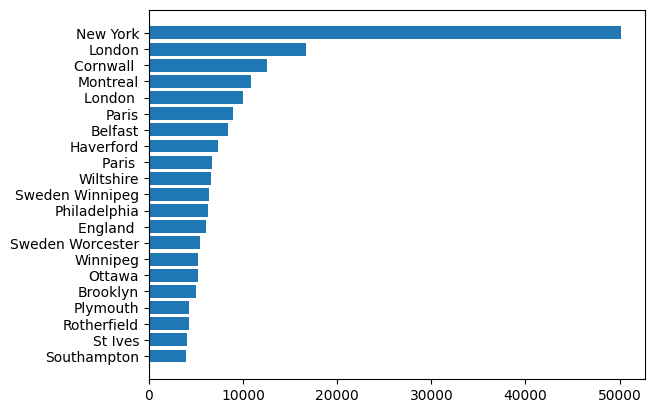

In [13]:
# топ-20 лучших регионов по сумме чека

plt.barh(tbl_4.index[-21:], tbl_4[('sum', 'bill')][-21:])

В Нью-Йорке наблюдается однозначное лидерство по сумме покупки, остальной топ-20 распределён равномерно

<BarContainer object of 21 artists>

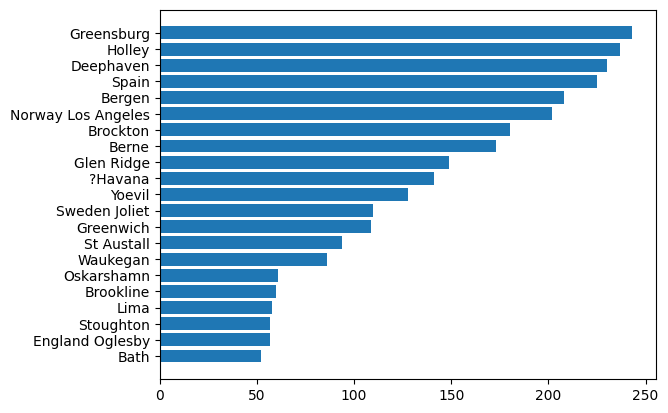

In [14]:
# топ-20 худших регионов по сумме чека

plt.barh(tbl_4.index[:21], tbl_4[('sum', 'bill')][:21])

В топ-20 худших регионов последние 6 показывают почти равные результаты по сумме покупки

## Задание 4
Определите совокупность факторов, которые положительно и отрицательно влияют на сумму покупки. Сформулируйте рекомендации по кратному увеличению продаж с учётом полученных результатов. Выполните визуализацию результатов анализа зависимости. Чтобы выполнить задание, можно использовать библиотеки Pandas и Seaborn или Plotly (по вашему выбору).

<BarContainer object of 4 artists>

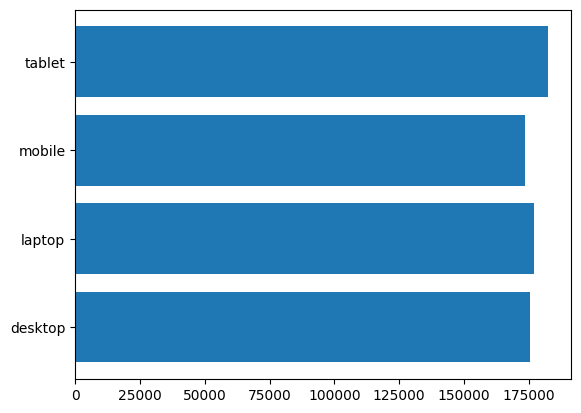

In [15]:
# распределение суммы покупки по типу устройства

plt.barh(tbl_1.index, tbl_1[('sum', 'bill')])

<BarContainer object of 4 artists>

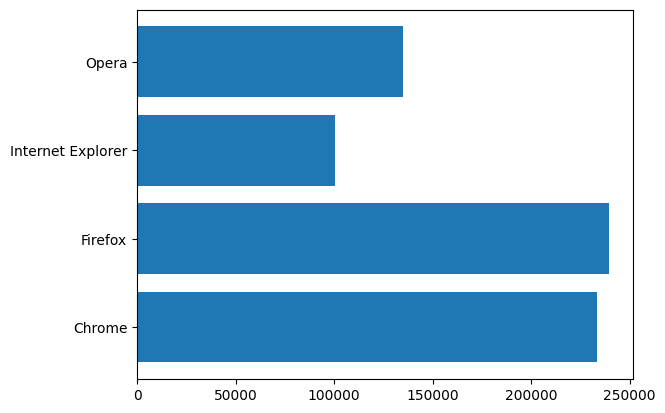

In [16]:
# распределение суммы покупки по браузерам

plt.barh(tbl_2.index, tbl_2[('sum', 'bill')])

<BarContainer object of 2 artists>

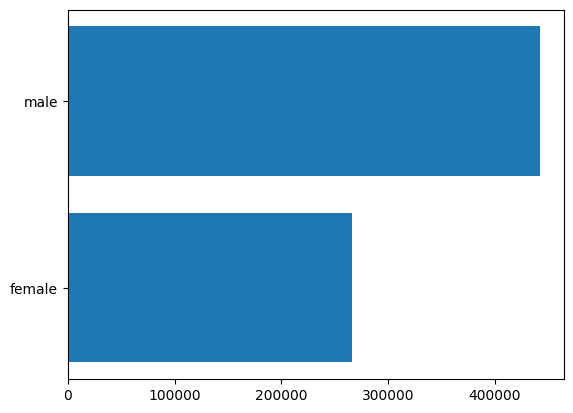

In [17]:
# распределение суммы покупки по полу

plt.barh(tbl_3.index, tbl_3[('sum', 'bill')])

Чтобы однозначно дать оценку того, какая номинативная перменная (или совокупность переменных) влияет на чек, стоит провести многофакторный дисперсионный анализ (3-way ANOVA)

In [18]:
# Зависимость суммы покупки от браузера, устройства и пола (многофакторный ANOVA)

model = ols("""bill ~ C(device_type) + C(browser) + C(sex) +
               C(device_type):C(browser) + C(device_type):C(sex) + C(browser):C(sex) +
               C(device_type):C(browser):C(sex)""", data=df).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(device_type),5.082735e+05,3.0,0.977659,0.402580
C(browser),7.609035e+05,3.0,1.463591,0.223026
C(sex),2.090553e+02,1.0,0.001206,0.972301
C(device_type):C(browser),2.647520e+05,9.0,0.169749,0.996899
C(device_type):C(sex),5.228425e+05,3.0,1.005683,0.389532
C(browser):C(sex),1.427713e+05,3.0,0.274619,0.843733
C(device_type):C(browser):C(sex),9.004163e+05,9.0,0.577314,0.816437
Residual,1.530204e+08,883.0,NaN,NaN


Вывод по ANOVA: ни одна из перменных или их совокупностей не оказывает статистически значимого влияния на чек покупки, т.к. во всех случаях p-уровень значимости (PR(>F)) не опускается ниже 0,05

РЕКОМЕНДАЦИИ по увеличению продаж:

Тем не менее, согласно мат. модели, построенной в ходе ANOVA, можно сделать вывод, что наибольшее влияние на чек оказывают браузеры и сочетание браузера и пола. Это же наблюдается и в вышепостроенных графиках: лучшие показатели по сумме чека показывают 1) мужчины, 2) firefox, chrome. Стоит сосредоточиться на оптимизации сайта под технические нужды этих браузеров, рекламные кампании - под интересы мужского пола